<a href="https://colab.research.google.com/github/villafue/Machine_Learning_Notes/blob/master/Supervised_Learning/Supervised%20Learning%20with%20Scikit-Learn/Time%20Series%20Analysis%20in%20Python/3%20Autoregressive%20(AR)%20Models/3%20Autoregressive_(AR)_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introducing an AR Model
In an Autoregressive model,

2. Mathematical Description of AR(1) Model
or AR model, today's value equals a mean plus a fraction phi of yesterday's value, plus noise. Since there is only one lagged value on the right hand side, this is called an AR model of order 1, or simply an AR(1) model. If the AR parameter, phi, is one, then the process is a random walk. If phi is zero, then the process is white noise. In order for the process to be stable and stationary, phi has to be between -1 and +1.

3. Interpretation of AR(1) Parameter
As an example, suppose R_t is a time series of stock returns. If phi is negative, then a positive return last period, at time t-1, implies that this period's return is more likely to be negative. This was referred to as "mean reversion" in Chapter 1. On the other hand, if phi is positive, then a positive return last period implies that this period's return is expected to be positive. This was referred to as "momentum" in Chapter 1.

4. Comparison of AR(1) Time Series
Here are four simulated time series with different AR parameters. When phi equals 0-point-9, it looks close to a random walk. When phi equals minus 0-point-9, the process looks more erratic - a large positive value is usually followed by a large negative one. The bottom two are similar, but are less exaggerated and closer to white noise.

5. Comparison of AR(1) Autocorrelation Functions
Here are four autocorrelation functions for different AR parameters. The autocorrelation decays exponentially at a rate of phi. Therefore if phi is 0-point-9, the lag-1 autocorrelation is 0-point-9, the lag-2 autocorrelation is 0-point-9 squared, the lag-3 autocorrelation is 0-point-9 cubed, etc. When phi is negative, the autocorrelation function still decays exponentially, but the signs of the autocorrelation function reverse at each lag.

6. Higher Order AR Models
So far, we've been only looking at AR(1) models. The model can be extended to include more lagged values and more phi parameters. Here we show an AR(1), an AR(2), and an AR(3).

7. Simulating an AR Process
Often, if you want to study and understand a pure AR process, it is useful to work with simulated data. Statsmodels provides modules for simulating AR processes. First, import the class, ArmaProcess. Then define the order and parameters of the AR process. The convention is a little counterintuitive: You must include the zero-lag coefficient of 1, and the sign of the other coefficient is the opposite of what we have been using. For example, for an AR(1) process with phi equal to plus 0-point-9, the second element of the ar array should be the opposite sign, *minus 0-point-9*. This is consistent with the time series literature in the field of signal processing. You also have to input the MA parameters. You will learn about MA models in the next chapter, so for now, just ignore the MA part. Then, you create an instance of the class ArmaProcess. To simulate data, use the method generate_sample, with the number of simulated samples as an argument.

8. Let's practice!
Now let's try some examples.

# Simulate AR(1) Time Series
You will simulate and plot a few AR(1) time series, each with a different parameter, , using the arima_process module in statsmodels. In this exercise, you will look at an AR(1) model with a large positive  and a large negative , but feel free to play around with your own parameters.

There are a few conventions when using the arima_process module that require some explanation. First, these routines were made very generally to handle both AR and MA models. We will cover MA models next, so for now, just ignore the MA part. Second, when inputting the coefficients, you must include the zero-lag coefficient of 1, and the sign of the other coefficients is opposite what we have been using (to be consistent with the time series literature in signal processing). For example, for an AR(1) process with , the array representing the AR parameters would be ar = np.array([1, -0.9])

Instructions

1. Import the class ArmaProcess in the arima_process module.

2. Plot the simulated AR processes:

 - Let ar1 represent an array of the AR parameters [1, ] as explained above. For now, the MA parameter array, ma1, will contain just the lag-zero coefficient of one.
 - With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called AR_object1.
 - Simulate 1000 data points from the object you just created, AR_object1, using the method .generate_sample(). Plot the simulated data in a subplot.

3. Repeat for the other AR parameter.

In [ ]:
# import the module for simulating data
from statsmodels.tsa.arima_process import ArmaProcess

# Plot 1: AR parameter = +0.9
plt.subplot(2,1,1)
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR_object1 = ArmaProcess(ar1, ma1)
simulated_data_1 = AR_object1.generate_sample(nsample=1000)
plt.plot(simulated_data_1)

# Plot 2: AR parameter = -0.9
plt.subplot(2,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = AR_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)
plt.show()

Conclusion

The two AR parameters produce very different looking time series plots, but in the next exercise you'll really be able to distinguish the time series.

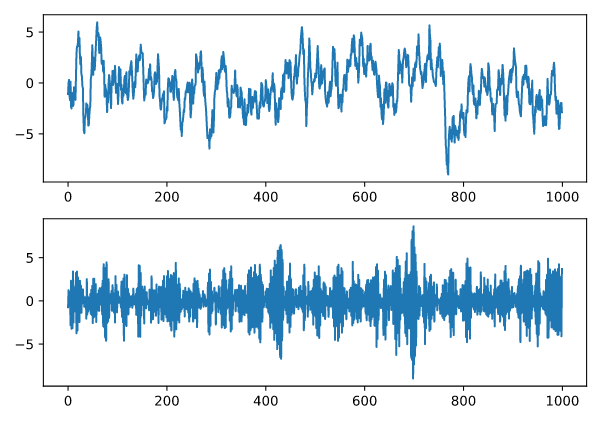

# Compare the ACF for Several AR Time Series
The autocorrelation function decays exponentially for an AR time series at a rate of the AR parameter. For example, if the AR parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
    <mo>=</mo>
    <mo>+</mo>
    <mn>0.9</mn>
  </mstyle>
</math> , the first-lag autocorrelation will be 0.9, the second-lag will be 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo>=</mo>
    <mn>0.81</mn>
  </mstyle>
</math>, the third-lag will be 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>3</mn>
    </msup>
    <mo>=</mo>
    <mn>0.729</mn>
  </mstyle>
</math>, etc. A smaller AR parameter will have a steeper decay, and for a negative AR parameter, say -0.9, the decay will flip signs, so the first-lag autocorrelation will be -0.9, the second-lag will be 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>2</mn>
    </msup>
    <mo>=</mo>
    <mn>0.81</mn>
  </mstyle>
</math>, the third-lag will be 
<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mo stretchy="false">(</mo>
    <mo>&#x2212;</mo>
    <mn>0.9</mn>
    <msup>
      <mo stretchy="false">)</mo>
      <mn>3</mn>
    </msup>
    <mo>=</mo>
    <mo>&#x2212;</mo>
    <mn>0.729</mn>
  </mstyle>
</math>, etc.

The object `simulated_data_1` is the simulated time series with an AR parameter of +0.9, `simulated_data_2` is for an AR parameter of -0.9, and `simulated_data_3` is for an AR parameter of 0.3

Instructions

1. Compute the autocorrelation function for each of the three simulated datasets using the plot_acf function with 20 lags (and suppress the confidence intervals by setting alpha=1).

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

Conclusion

Well Done! The ACF plots match what we predicted.

# Plot 1: AR parameter = +0.9
plot_acf(simulated_data_1, alpha=1, lags=20)
plt.show()

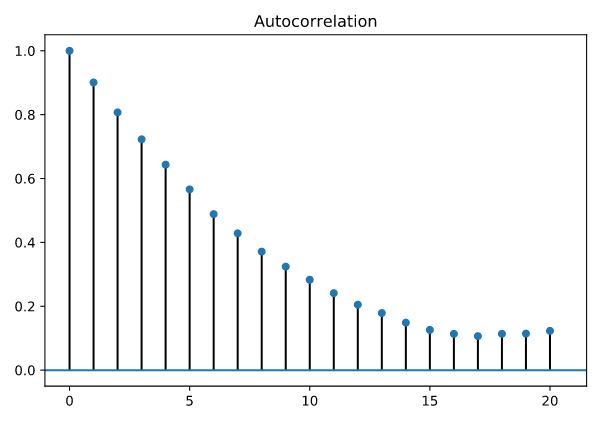

# Plot 2: AR parameter = -0.9
plot_acf(simulated_data_2, alpha=1, lags=20)
plt.show()

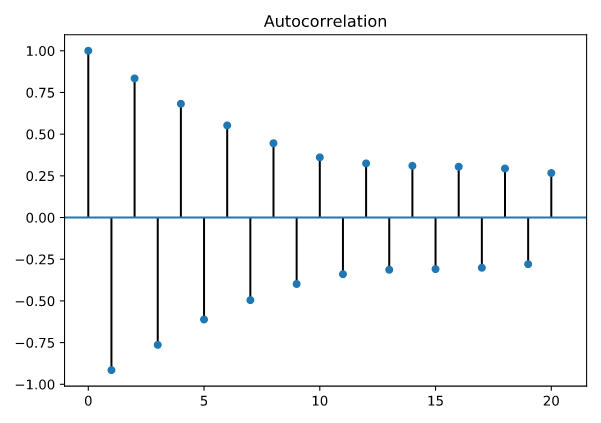

# Plot 3: AR parameter = +0.3
plot_acf(simulated_data_3, alpha=1, lags=20)
plt.show()

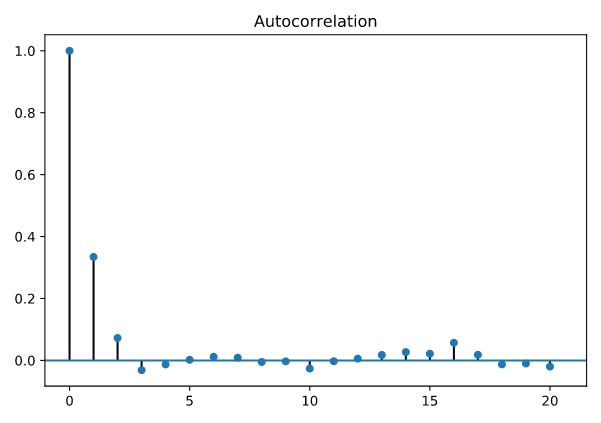

# Match AR Model with ACF

Here are four Autocorrelation plots:

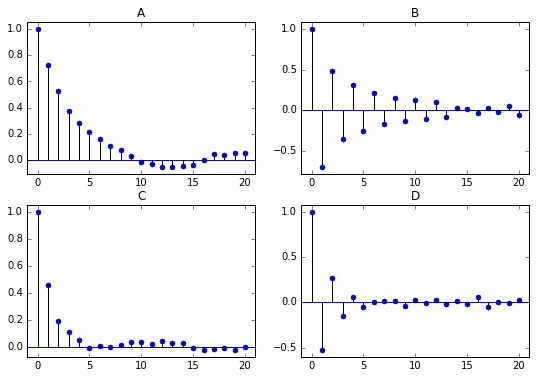

Which figure corresponds to an AR(1) model with an AR parameter of -0.5?

Incorrect Answers

A

 - This has a positive AR parameter

B

- This AR parameter is more negative than -0.5 (look at the lag-one autocorrelation)

C

 - This has a positive AR parameter

Correct Answer

D

Well done!


# 1. Estimating and Forecasting an AR Model
Statsmodels has another module for estimating the parameters of a given AR model.

2. Estimating an AR Model
Import ARMA, which is a class, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. The order (1,0) means you're fitting the data to an AR(1) model. An order (2,0) would mean you're fitting the data to an AR(2) model. The second part of the order is the MA part, which will be discussed in the next chapter. Once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

3. Estimating an AR Model
To see the full output, use the summary method on result. The coefficients for the mean mu and AR(1) parameter phi are highlighted in red. In the simulated data, mu was zero and phi was 0-point-9, and you can see that the estimated parameters are very close to the true parameters.

4. Estimating an AR Model
If you just want to see the coefficients rather than the entire regression output, you can use the dot-params property, which returns an array of the fitted coefficients, mu and phi in this case.

5. Forecasting an AR Model
To do forecasting, both in sample and out of sample, you still create an instance of the class using ARMA, and you use the fit method just as you did in the last two slides to *estimate* the parameters. But now, use the method plot_predict to do forecasting. You give it the start and end data points for fitting. If the index of the data is a DatetimeIndex object as it is here, you can pick dates for the start and end date. The plot also gives confidence intervals around the out-of-sample forecasts. Notice how the confidence interval gets wider the farther out the forecast is.

6. Let's practice!
Time to put this into practice.

# Estimating an AR Model
You will estimate the AR(1) parameter, <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
  </mstyle>
</math>, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For `simulated_data_1` with a true <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
  </mstyle>
</math> of 0.9, you will print out the estimate of <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
  </mstyle>
</math>. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

Instructions

1. Import the class ARMA in the module statsmodels.tsa.arima_model.

2. Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1)), is order=(1,0).

3. Fit the model mod using the method .fit() and save it in a results object called res.

4. Print out the entire summary of results using the .summary() method.

5. Just print out an estimate of the constant and  using the .params attribute (no parentheses).

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Fit an AR(1) model to the first simulated data
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()

# Print out summary information on the fit
print(res.summary())

# Print out the estimate for the constant and for phi
print("When the true phi=0.9, the estimate of phi (and the constant) are:")
print(res.params)

'''
<script.py> output:

Conclusion

Notice how close the estimated parameter is to the true parameter.

                                  ARMA Model Results                              
    ==============================================================================
    Dep. Variable:                      y   No. Observations:                 1000
    Model:                     ARMA(1, 0)   Log Likelihood               -1420.051
    Method:                       css-mle   S.D. of innovations              1.000
    Date:                Mon, 30 Nov 2020   AIC                           2846.103
    Time:                        00:27:55   BIC                           2860.826
    Sample:                             0   HQIC                          2851.699
                                                                                  
    ==============================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
    ------------------------------------------------------------------------------
    const         -0.3986      0.317     -1.257      0.209      -1.020       0.223
    ar.L1.y        0.9011      0.014     66.094      0.000       0.874       0.928
                                        Roots                                    
    =============================================================================
                      Real          Imaginary           Modulus         Frequency
    -----------------------------------------------------------------------------
    AR.1            1.1097           +0.0000j            1.1097            0.0000
    -----------------------------------------------------------------------------
   
   
    When the true phi=0.9, the estimate of phi (and the constant) are:
    [-0.39859166  0.90110551]
'''

# Forecasting with an AR Model

In addition to estimating the parameters of a model that you did in the last exercise, you can also do forecasting, both in-sample and out-of-sample using statsmodels. The in-sample is a forecast of the next data point using the data up to that point, and the out-of-sample forecasts any number of data points in the future. These forecasts can be made using either the predict() method if you want the forecasts in the form of a series of data, or using the plot_predict() method if you want a plot of the forecasted data. You supply the starting point for forecasting and the ending point, which can be any number of data points after the data set ends.

For the simulated series simulated_data_1 with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
    <mo>=</mo>
    <mn>0.9</mn>
  </mstyle>
</math>, you will plot in-sample and out-of-sample forecasts.

Instructions

1. Import the class ARMA in the module statsmodels.tsa.arima_model

2. Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an AR(1) order=(1,0)

3. Fit the model mod using the method .fit() and save it in a results object called res

4. Plot the in-sample and out-of-sample forecasts of the data using the plot_predict() method

5. Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast the first AR(1) model
mod = ARMA(simulated_data_1, order=(1,0))
res = mod.fit()
res.plot_predict(start=990, end=1010)
plt.show()

Conclusion

Notice how, when phi is high like here, the forecast gradually moves to the long term mean of zero, but if phi were low, it would move much quicker to the long term mean. Try it out and see for yourself!

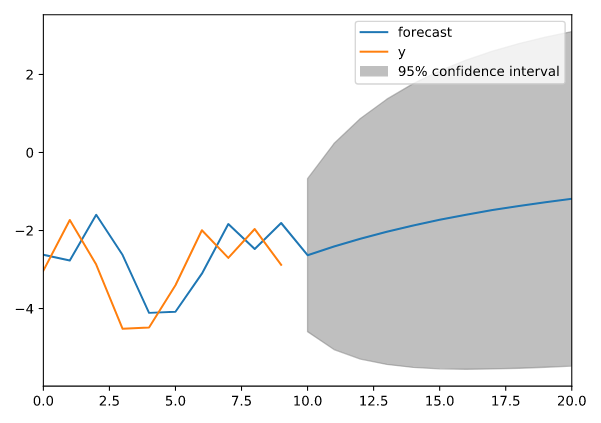

# Let's Forecast Interest Rates
You will now use the forecasting techniques you learned in the last exercise and apply it to real data rather than simulated data. You will revisit a dataset from the first chapter: the annual data of 10-year interest rates going back 56 years, which is in a Series called interest_rate_data. Being able to forecast interest rates is of enormous importance, not only for bond investors but also for individuals like new homeowners who must decide between fixed and floating rate mortgages.

You saw in the first chapter that there is some mean reversion in interest rates over long horizons. In other words, when interest rates are high, they tend to drop and when they are low, they tend to rise over time. Currently they are below long-term rates, so they are expected to rise, but an AR model attempts to quantify how much they are expected to rise.

Instructions

1. Import the class ARMA in the module statsmodels.tsa.arima_model.

2. Create an instance of the ARMA class called mod using the annual interest rate data and choosing the order for an AR(1) model.

3. Fit the model mod using the method .fit() and save it in a results object called res.

4. Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method.
 - Pass the arguments start=0 to start the in-sample forecast from the beginning, and choose end to be '2022' to forecast several years in the future.
 - Note that the end argument 2022 must be in quotes here since it represents a date and not an integer position.

In [ ]:
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA

# Forecast interest rates using an AR(1) model
mod = ARMA(interest_rate_data, order=(1,0))
res = mod.fit()

# Plot the original series and the forecasted series
res.plot_predict(start=0, end='2022')
plt.legend(fontsize=8)
plt.show()

Conclusion

According to an AR(1) model, 10-year interest rates are forecasted to rise from 2.16%, towards the end of 2017 to 3.35% in five years.

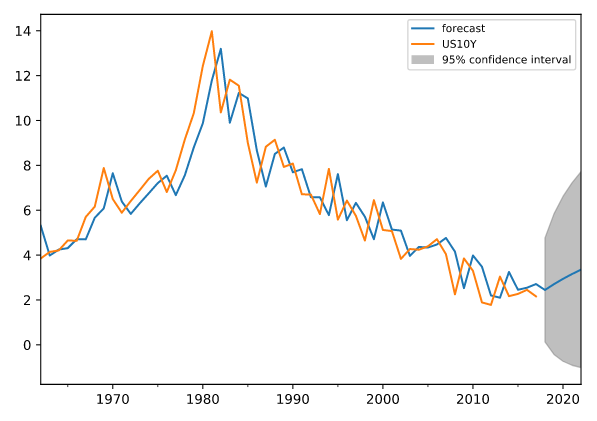

# Compare AR Model with Random Walk

Sometimes it is difficult to distinguish between a time series that is slightly mean reverting and a time series that does not mean revert at all, like a random walk. You will compare the ACF for the slightly mean-reverting interest rate series of the last exercise with a simulated random walk with the same number of observations.

You should notice when plotting the autocorrelation of these two series side-by-side that they look very similar.

Instructions

1. Import plot_acf function from the statsmodels module

2. Create two axes for the two subplots

3. Plot the autocorrelation function for 12 lags of the interest rate series interest_rate_data in the top plot

4. Plot the autocorrelation function for 12 lags of the interest rate series simulated_data in the bottom plot

In [ ]:
# Import the plot_acf module from statsmodels
from statsmodels.graphics.tsaplots import plot_acf

# Plot the interest rate series and the simulated random walk series side-by-side
fig, axes = plt.subplots(2,1)

# Plot the autocorrelation of the interest rate series in the top plot
fig = plot_acf(interest_rate_data, alpha=1, lags=12, ax=axes[0])

# Plot the autocorrelation of the simulated random walk series in the bottom plot
fig = plot_acf(simulated_data, alpha=1, lags=12, ax=axes[1])

# Label axes
axes[0].set_title("Interest Rate Data")
axes[1].set_title("Simulated Random Walk Data")
plt.show()

Conclusion

Notice the Autocorrelation functions look very similar for the two series.

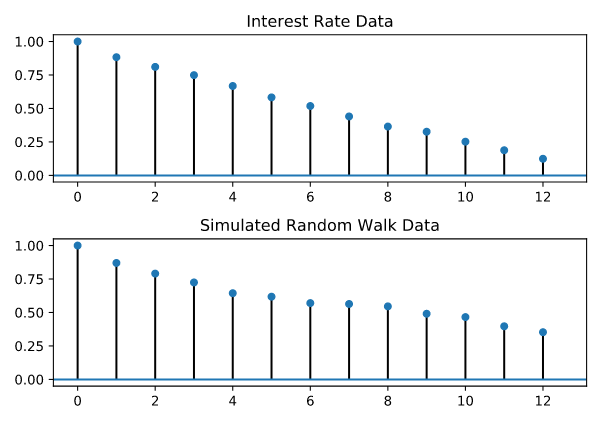


# 1. Choosing the Right Model
In practice, you will ordinarily not be told the order of the model that you're trying to estimate.

2. Identifying the Order of an AR Model
There are two techniques that can help determine the order of the AR model: The Partial Autocorrelation Function, and the Information Criteria

3. Partial Autocorrelation Function (PACF)
The Partial Autocorrelation Function measures the incremental benefit of adding another lag. Imagine running several regressions, where you regress returns on more and more lagged values. The coefficients in the red boxes represent the values of the partial autocorrelation function for different lags. For example, in the bottom row, the coefficient in the red box, phi 4-4, is the lag-4 value of the Partial Autocorrelation Function, and it represents how significant adding a fourth lag is when you already have three lags.

4. Plot PACF in Python
plot_pacf is the statsmodels function for plotting the partial autocorrelation function. The arguments are the same as that of the plot_acf module that you saw earlier. The input x is a series or array. The argument lags indicates how many lags of the parital autocorrelation function will be plotted. And the alpha argument sets the width of the confidence interval.

5. Comparison of PACF for Different AR Models
These plots show the Partial Autocorrelation Function for AR models of different orders. In the upper left, for an AR(1) model, only the lag-*1* PACF is significantly different from zero. Similarly, for an AR(2) model, two lags are different from zero, and for and AR(3), three lags are different from zero. Finally, for White Noise, there are no lags that are significantly different from zero.

6. Information Criteria
The more parameters in a model, the better the model will fit the data. But this can lead to overfitting of the data. The information criteria adjusts the goodness-of-fit of a model by imposing a penalty based on the number of parameters used. Two common adjusted goodness-of-fit measures are called the Akaike Information Criterion and the Bayesian Information Criterion.

7. Information Criteria
This is the full output from estimating an AR(2) model. The AIC and BIC are highlighted in the red box. To get the AIC and BIC statistics,

8. Getting Information Criteria From `statsmodels`
you follow the same procedure from the last section to fit the data to a model. In the last section, you learned how to get the full output using summary or just the AR parameters using the params attribute. You can also get the AIC or BIC using those attributes. In practice, the way to use the information criteria is to fit several models, each with a different number of parameters, and choose the one with the lowest Bayesian information criterion.

9. Information Criteria
Suppose we are given a time series of data, and unknown to us, it was simulated from an AR(3) model. Here is a plot of the BIC when we fit the data to an AR(1) up to an AR(8) model. You can see that the lowest BIC occurs for an AR(3).

10. Let's practice!
Now it's your turn.

# Estimate Order of Model: PACF

One useful tool to identify the order of an AR model is to look at the Partial Autocorrelation Function (PACF). In this exercise, you will simulate two time series, an AR(1) and an AR(2), and calculate the sample PACF for each. You will notice that for an AR(1), the PACF should have a significant lag-1 value, and roughly zeros after that. And for an AR(2), the sample PACF should have significant lag-1 and lag-2 values, and zeros after that.

Just like you used the plot_acf function in earlier exercises, here you will use a function called plot_pacf in the statsmodels module.

Instructions

1. Import the modules for simulating data and for plotting the PACF

2. Simulate an AR(1) with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <mi>&#x3D5;</mi>
    <mo>=</mo>
    <mn>0.6</mn>
  </mstyle>
</math> (remember that the sign for the AR parameter is reversed)

3. Plot the PACF for simulated_data_1 using the plot_pacf function

4. Simulate an AR(2) with <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mstyle mathsize="0.85em">
    <msub>
      <mi>&#x3D5;</mi>
      <mn>1</mn>
    </msub>
    <mo>=</mo>
    <mn>0.6</mn>
    <mo>,</mo>
    <msub>
      <mi>&#x3D5;</mi>
      <mn>2</mn>
    </msub>
    <mo>=</mo>
    <mn>0.3</mn>
  </mstyle>
</math> 
 (again, reverse the signs)

4. Plot the PACF for simulated_data_2 using the plot_pacf function

In [ ]:
# Import the modules for simulating data and for plotting the PACF
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_pacf

# Simulate AR(1) with phi=+0.6
ma = np.array([1])
ar = np.array([1, -0.6])
AR_object = ArmaProcess(ar, ma)
simulated_data_1 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(1)
plot_pacf(simulated_data_1, lags=20)
plt.show()

# Simulate AR(2) with phi1=+0.6, phi2=+0.3
ma = np.array([1])
ar = np.array([1, -0.6, -0.3])
AR_object = ArmaProcess(ar, ma)
simulated_data_2 = AR_object.generate_sample(nsample=5000)

# Plot PACF for AR(2)
plot_pacf(simulated_data_2, lags=20)
plt.show()

Conclusion

Notice that the number of significant lags for the PACF indicate the order of the AR model

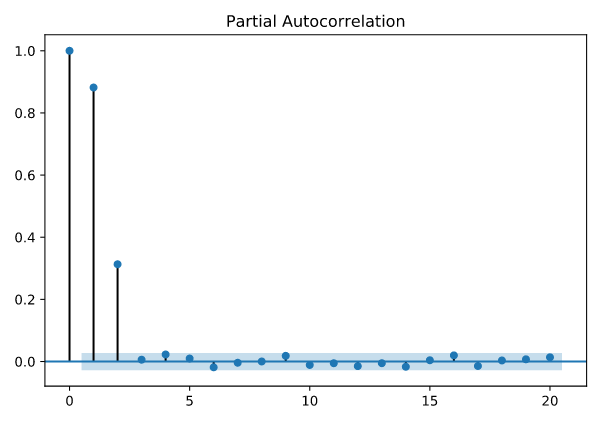

# Estimate Order of Model: Information Criteria

Another tool to identify the order of a model is to look at the Akaike Information Criterion (AIC) and the Bayesian Information Criterion (BIC). These measures compute the goodness of fit with the estimated parameters, but apply a penalty function on the number of parameters in the model. You will take the AR(2) simulated data from the last exercise, saved as simulated_data_2, and compute the BIC as you vary the order, p, in an AR(p) from 0 to 6.

Instructions

1. Import the ARMA module for estimating the parameters and computing BIC.

2. Initialize a numpy array BIC, which we will use to store the BIC for each AR(p) model.

3. Loop through order p for p = 0,…,6.
 - For each p, fit the data to an AR model of order p.
 - For each p, save the value of BIC using the .bic attribute (no parentheses) of res.

4. Plot BIC as a function of p (for the plot, skip p=0 and plot for p=1,…6).

In [ ]:
# Import the module for estimating an ARMA model
from statsmodels.tsa.arima_model import ARMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARMA(simulated_data_2, order=(p,0))
    res = mod.fit()
# Save BIC for AR(p)    
    BIC[p] = res.bic
    
# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

Conclusion

For an AR(2), the BIC achieves its minimum at p=2, which is what we expect.

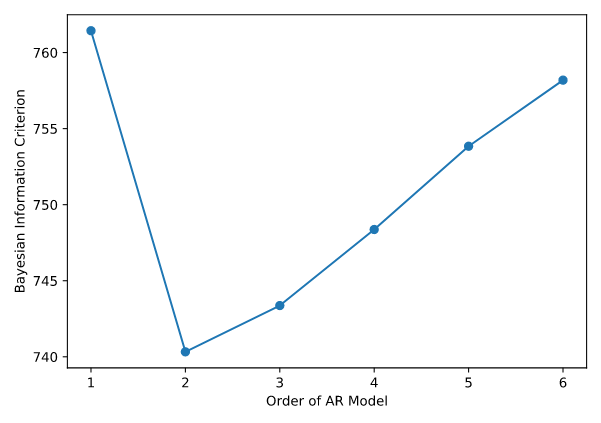